In [1]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("E:/Practice for potfolio/archive/Titanic-Dataset.csv")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.drop(['Cabin','Name', 'SibSp','Parch','Ticket'], axis = 1)

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x296e37fc190>,
 'caps': [<matplotlib.lines.Line2D at 0x296e4191a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x296e4183710>],
 'medians': [<matplotlib.lines.Line2D at 0x296e4193250>],
 'fliers': [<matplotlib.lines.Line2D at 0x296e4193cd0>],
 'means': []}

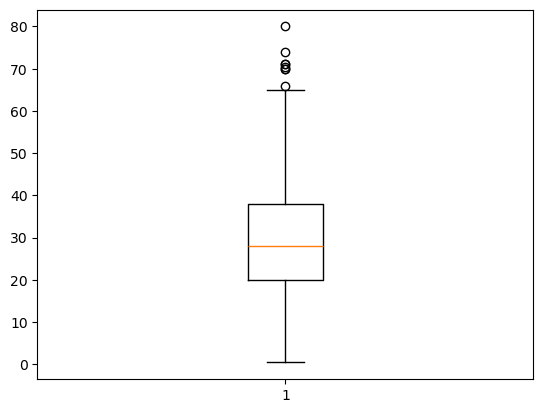

In [8]:

plt.boxplot(df['Age'])

In [9]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]


In [12]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,29.1250,Q
886,887,0,2,male,27.0,13.0000,S
887,888,1,1,female,19.0,30.0000,S
889,890,1,1,male,26.0,30.0000,C


{'whiskers': [<matplotlib.lines.Line2D at 0x296e4232cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x296e4244650>,
 'boxes': [<matplotlib.lines.Line2D at 0x296e4232010>],
 'medians': [<matplotlib.lines.Line2D at 0x296e4245cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x296e4246790>],
 'means': []}

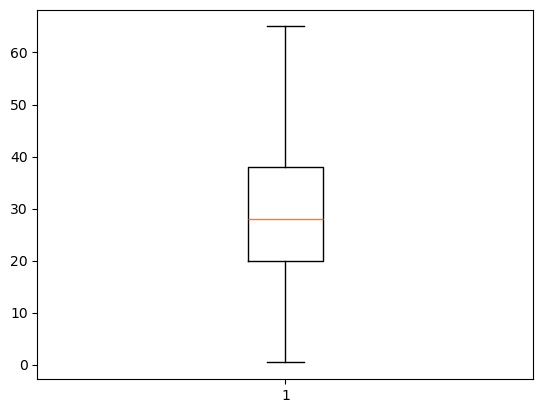

In [13]:
plt.boxplot(df['Age'])

In [14]:
import numpy as np

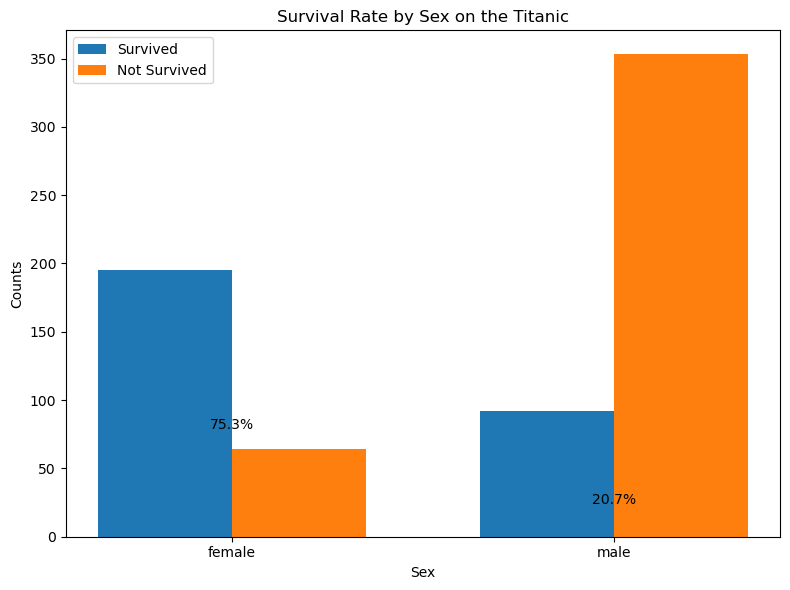

In [15]:
survival_counts = df.groupby('Sex')['Survived'].sum()
total_counts = df['Sex'].value_counts()

# Calculate survival rate
survival_rate = survival_counts / total_counts * 100

survival_counts = df.groupby('Sex')['Survived'].value_counts().unstack()
survival_counts['Total'] = df['Sex'].value_counts()  # Total counts by sex

# Calculate survival rate
survival_counts['Survival Rate (%)'] = (survival_counts[1] / survival_counts['Total']) * 100

# Plotting a clustered bar chart
labels = survival_counts.index
x = np.arange(len(labels))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, survival_counts[1], width, label='Survived')
bar2 = ax.bar(x + width/2, survival_counts[0], width, label='Not Survived')

# Add text annotations showing survival rate
for i, v in enumerate(survival_counts['Survival Rate (%)']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

ax.set_xlabel('Sex')
ax.set_ylabel('Counts')
ax.set_title('Survival Rate by Sex on the Titanic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [66]:
X = df.drop('Survived', axis = 1)
y = df.Survived


(     PassengerId  Pclass     Sex   Age     Fare Embarked
 0              1       3    male  22.0   7.2500        S
 1              2       1  female  38.0  71.2833        C
 2              3       3  female  26.0   7.9250        S
 3              4       1  female  35.0  53.1000        S
 4              5       3    male  35.0   8.0500        S
 ..           ...     ...     ...   ...      ...      ...
 885          886       3  female  39.0  29.1250        Q
 886          887       2    male  27.0  13.0000        S
 887          888       1  female  19.0  30.0000        S
 889          890       1    male  26.0  30.0000        C
 890          891       3    male  32.0   7.7500        Q
 
 [704 rows x 6 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 704, dtype: int64)

In [68]:
encoded_df = pd.get_dummies(X, columns=['Sex', 'Embarked'])

In [70]:
encoded_df

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,False,True,False,False,True
1,2,1,38.0,71.2833,True,False,True,False,False
2,3,3,26.0,7.9250,True,False,False,False,True
3,4,1,35.0,53.1000,True,False,False,False,True
4,5,3,35.0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
885,886,3,39.0,29.1250,True,False,False,True,False
886,887,2,27.0,13.0000,False,True,False,False,True
887,888,1,19.0,30.0000,True,False,False,False,True
889,890,1,26.0,30.0000,False,True,True,False,False


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(encoded_df, y ,test_size = 0.2)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8156028368794326


In [92]:
y_test[:10]

268    1
608    1
200    0
717    1
144    0
398    0
236    0
434    0
580    1
616    0
Name: Survived, dtype: int64

In [28]:
model.predict(X_test[:10])

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)